## Randomly Generate A Stock Price & View The Data

Here, we create an application which is submitted to a remote host, yet we retrieve its data remotely via views. This way, we can graph remote data inside of Jupyter without needing to run the application on the local host.

First, we create an application which generates a random stock price by using the jsonRandomWalk class. After we create the stream, we create a `view` object. This can later be used to retrieve the remote data.

In [1]:
from streamsx.topology.topology import Topology
from streamsx.topology import context
from some_module import jsonRandomWalk
#from streamsx import rest
import json
import logging

# Define topology & submit
rw = jsonRandomWalk()
top = Topology("myTop")
stock_data = top.source(rw)

# The view object can be used to retrieve data remotely
view = stock_data.view()

stock_data.print()

## Submit To Remote Streams Install

Then, we submit the application to the default domain.

In [2]:
context.submit("DISTRIBUTED", top.graph, username = "streamsadmin", password = "passw0rd")

2016-11-17 01:54:20,931 - streamsx.topology.py_submit - INFO - Generating SPL and submitting application.


Nov 17, 2016 1:54:23 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: Invoking spl-make-toolkit
Nov 17, 2016 1:54:23 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: /opt/ibm/InfoSphere_Streams/4.2.0.0/bin/spl-make-toolkit --make-operator -i /home/streamsadmin/git/streamsx.topology/samples/python/topology/notebooks/ViewDemo/tk2331783198389979848
Nov 17, 2016 1:54:25 AM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: spl-make-toolkit complete: return code=0
Nov 17, 2016 1:54:25 AM com.ibm.streamsx.topology.internal.streams.InvokeSc getToolkitPath
INFO: ToolkitPath:/home/streamsadmin/git/streamsx.topology/com.ibm.streamsx.topology:/opt/ibm/InfoSphere_Streams/4.2.0.0/toolkits
Nov 17, 2016 1:54:25 AM com.ibm.streamsx.topology.internal.streams.InvokeSc invoke
INFO: Invoking SPL compiler (sc) for main composite: myTop::myTop
Nov 17, 2016 1:54:25 AM com.ibm.streamsx.topology.internal.streams.InvokeSc invoke
INFO

## Begin Retreiving The Data In A Blocking Queue

Using the view object, we can call the `start_data_fetch` method. This kicks off a background thread which, once per second, queries the remote view REST endpoint and inserts the data into a queue. The queue is returned from `start_data_fetch`.

In [3]:
from streamsx import rest
queue = view.start_data_fetch()

## Print Data to Screen

The queue is a blocking queue, so every time queue.get() is invoked, it will wait until there is more data on the stream. The following is one way of iterating over the queue.

In [4]:
for i in iter(queue.get, 60):
    print(i)

{'val': 0.18059393034056204}
{'val': 0.1779803516330163}
{'val': 0.20590448968624825}
{'val': 0.20022397535564396}
{'val': 0.18700607203075234}
{'val': 0.17254477362265255}
{'val': 0.17565349403113037}
{'val': 0.2093184028587753}
{'val': 0.23371843156226166}
{'val': 0.25007097075662416}
{'val': 0.2626773779396563}
{'val': 0.2243215967438934}
{'val': 0.23909967201590632}
{'val': 0.2792542601704512}
{'val': 0.28449236649978915}
{'val': 0.2770934110059149}
{'val': 0.23048919092840492}
{'val': 0.219474000335635}
{'val': 0.2465900347305683}
{'val': 0.2693777355381819}
{'val': 0.2780112481447902}
{'val': 0.2763457638276144}
{'val': 0.23272168572370353}
{'val': 0.2481005713300497}
{'val': 0.24883683773934145}


KeyboardInterrupt: 

## Stop Fetching The Data, Cancelling The Background Thread

To stop the background thread from fetching data, invoke the `stop_data_fetch` method on the view.

In [5]:
view.stop_data_fetch()

## Graph The Live Feed Using Matplotlib

One of Jupyter strengths is its capacity for data visualization. Here, we can use Matplotlib to interactively update the graph  when new data is (or is not) available.

<IPython.core.display.Javascript object>


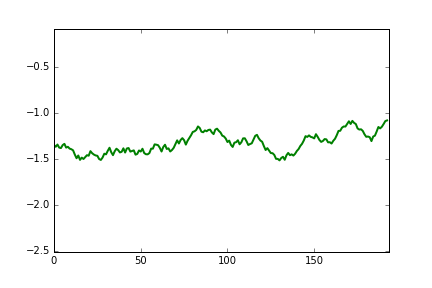

KeyboardInterrupt: 

In [6]:
%matplotlib inline
%matplotlib notebook

from streamsx import rest
rest.graph_every(view, 'val', 1.0)